## **Prediccion Predicción del Consumo Energético en función de la Temperatura utilizando Regresión Lineal**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np  # Para operaciones matemáticas y generación de números aleatorios
import pandas as pd  # Para manipulación de datos en estructuras como DataFrame
import matplotlib.pyplot as plt  # Para crear gráficos visuales
import seaborn as sns  # Para visualización avanzada con gráficos estilizados
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluar el rendimiento del modelo

In [3]:
df= pd.read_csv('df/DatosTemperatura.csv')

### **# Exploratory Data Analysis (EDA) - Análisis exploratorio de datos**

In [ ]:
df.head()

,No,Temperature,EnergyConsumption
0,0,14.981605,47.889247
1,1,38.028572,103.576394
2,2,29.279758,83.658198
3,3,23.946339,59.928004
4,4,6.240746,24.503505


In [4]:
df= df.drop('No', axis=1)

In [5]:
df.head()

,Temperature,EnergyConsumption
0,14.981605,47.889247
1,38.028572,103.576394
2,29.279758,83.658198
3,23.946339,59.928004
4,6.240746,24.503505


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        100 non-null    float64
 1   EnergyConsumption  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
df.describe()

,Temperature,EnergyConsumption
count,100.000000,100.000000
mean,18.807230,57.012673
std,11.899576,29.413357
min,0.220885,9.925608
25%,7.728030,31.926021
50%,18.565698,54.728704
75%,29.208125,83.675376
max,39.475477,112.597808


**Diagrama de Dispersion**

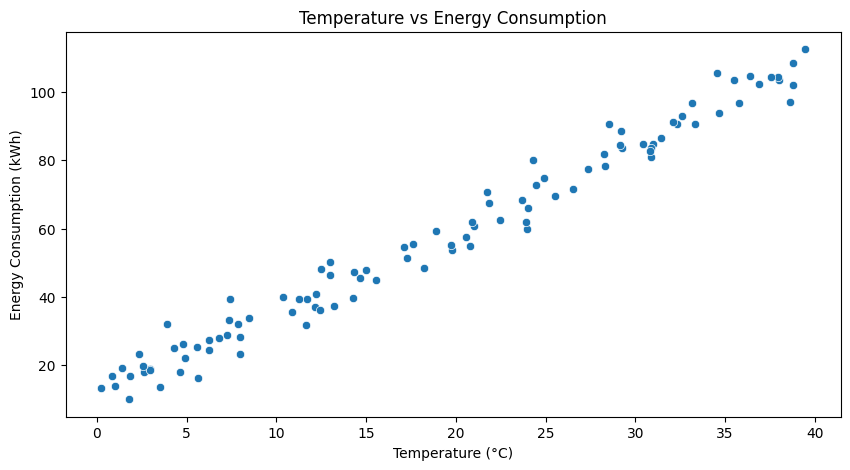

In [8]:
plt.figure(figsize=(10, 5))  # Establecemos el tamaño de la figura para los gráficos
sns.scatterplot(x=df['Temperature'], y=df['EnergyConsumption'])  # Graficamos los datos en un diagrama de dispersión
plt.xlabel('Temperature (°C)')  # Etiqueta para el eje X
plt.ylabel('Energy Consumption (kWh)')  # Etiqueta para el eje Y
plt.title('Temperature vs Energy Consumption')  # Título del gráfico
plt.show()  # Mostramos el gráfico

Corrrelacion entre variables

In [9]:
# Correlación entre las variables
print("Correlación:")
print(df.corr())  # Imprimimos la matriz de correlación entre las variables del DataFrame

Correlación:
                   Temperature  EnergyConsumption
Temperature           1.000000           0.988158
EnergyConsumption     0.988158           1.000000


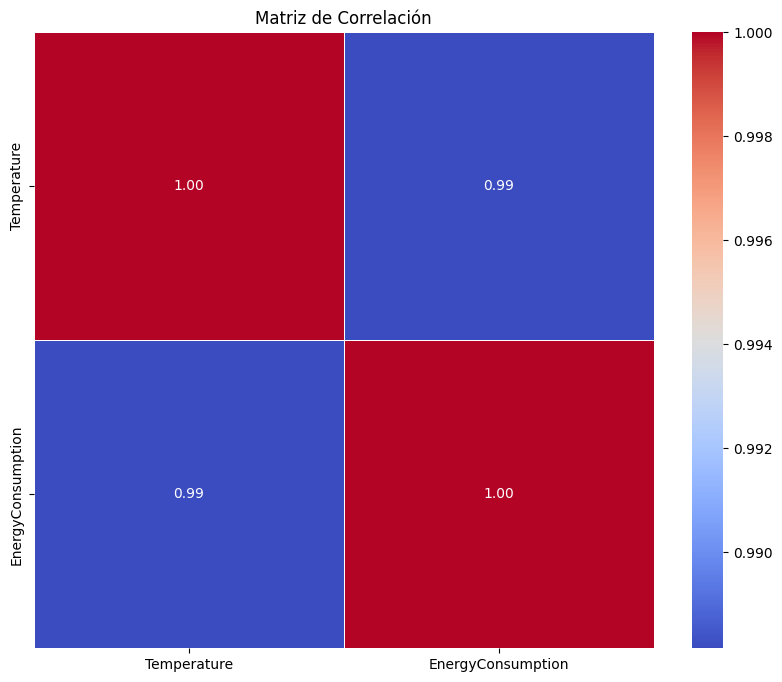

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# División de los datos en conjunto de entrenamiento y conjunto de **prueba**

In [11]:
# División de los datos en conjunto de entrenamiento y conjunto de prueba
X = df[['Temperature']]  # Seleccionamos la columna 'Temperature' como variable independiente
y = df['EnergyConsumption']  # Seleccionamos la columna 'EnergyConsumption' como variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividimos los datos en 80% entrenamiento y 20% prueba


# Entrenamiento del modelo de regresión lineal


In [12]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()  # Creamos un objeto del modelo de regresión lineal
model.fit(X_train, y_train)  # Ajustamos el modelo a los datos de entrenamiento

LinearRegression()

In [13]:
# Predicciones con los datos de prueba
y_pred = model.predict(X_test)  # Hacemos predicciones sobre el conjunto de prueba

In [14]:
print(X_test)

    Temperature
83     2.542334
53    35.793094
70    30.889791
45    26.500891
44    10.351199
39    17.606100
22    11.685786
80    34.524137
10     0.823380
0     14.981605
18    17.277801
30    24.301794
73    32.618457
33    37.955421
90     4.783770
4      6.240746
76    30.850814
77     2.961786
12    33.297706
31     6.820965


In [15]:
print(y_pred)

[ 16.94285505  98.40159484  86.38933097  75.63726954  36.07325456
  53.84653405  39.34276626  95.2928648   12.73170782  47.41696507
  53.042257    70.249853    90.62427127 103.69893153  22.43399383
  26.00333814  86.29384414  17.97044167  92.28831523  27.42477739]


In [16]:
print(y_test)

83     19.638603
53     96.965357
70     81.039723
45     71.705291
44     39.833158
39     55.522986
22     39.240032
80    105.639215
10     16.635460
0      47.889247
18     51.233961
30     80.185415
73     93.031066
33    104.516324
90     26.069725
4      24.503505
76     83.726911
77     18.565734
12     90.595463
31     27.925301
Name: EnergyConsumption, dtype: float64


# Evaluación del rendimiento del modelo



In [17]:
# Evaluación del rendimiento del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos la raíz del error cuadrático medio (RMSE)
r2 = r2_score(y_test, y_pred)  # Calculamos el coeficiente de determinación (R²) para evaluar la calidad del modelo
print(f'RMSE: {rmse:.2f}')  # Mostramos el RMSE
print(f'R²: {r2:.2f}')  # Mostramos el R²

RMSE: 4.04
R²: 0.98


1. RMSE (Raíz del Error Cuadrático Medio) = 4.04:
El RMSE es una medida de la magnitud promedio de los errores de predicción. En otras palabras, indica cuánto se alejan, en promedio, las predicciones de los valores reales. Cuanto más bajo es el RMSE, mejor es el modelo. En tu caso, el RMSE es 4.04, lo que significa que, en promedio, las predicciones de tu modelo están a 4.04 unidades de distancia de los valores reales.

Interpretación: Un RMSE de 4.04 podría ser considerado bajo o alto dependiendo del rango de los datos. Si los valores de consumo energético son bastante grandes, entonces un error de 4.04 puede ser pequeño. Si los valores son más pequeños, entonces puede ser relativamente grande.
2. R² (Coeficiente de Determinación) = 0.98:
El R² es una métrica que indica el porcentaje de la variabilidad en la variable dependiente (en este caso, el consumo energético) que es explicado por el modelo. Su valor varía entre 0 y 1, donde:

0 significa que el modelo no explica nada de la variabilidad.
1 significa que el modelo explica toda la variabilidad de los datos.
Un R² de 0.98 indica que el modelo explica el 98% de la variabilidad en el consumo energético con base en la temperatura. Esto sugiere que el modelo es muy bueno para predecir los valores de consumo energético, ya que casi toda la variabilidad en los datos es explicada por la relación con la temperatura.

Resumen:
RMSE de 4.04 indica que, en promedio, las predicciones de tu modelo tienen un error de 4.04 unidades.
R² de 0.98 sugiere que el modelo es muy preciso y explica el 98% de la variabilidad en el consumo energético, lo que indica un ajuste excelente.
En general, estos valores sugieren que el modelo de regresión lineal se ajusta muy bien a los datos y hace predicciones bastante precisas.

# Visualización de resultados: comparando los valores reales y las predicciones


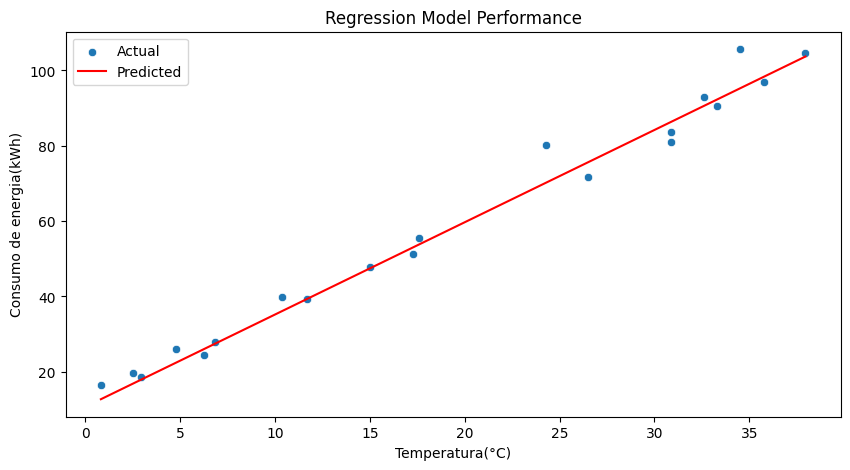

In [18]:

# Visualización de resultados: comparando los valores reales y las predicciones
plt.figure(figsize=(10, 5))  # Establecemos el tamaño de la figura para los gráficos
sns.scatterplot(x=X_test['Temperature'], y=y_test, label='Actual')  # Graficamos los valores reales (dispersión)
sns.lineplot(x=X_test['Temperature'], y=y_pred, color='red', label='Predicted')  # Graficamos las predicciones (línea roja)
plt.xlabel('Temperatura(°C)')  # Etiqueta para el eje X
plt.ylabel('Consumo de energia(kWh)')  # Etiqueta para el eje Y
plt.title('Regression Model Performance')  # Título del gráfico
plt.legend()  # Mostramos la leyenda
plt.show()  # Mostramos el gráfico

Realizamos la prediccion


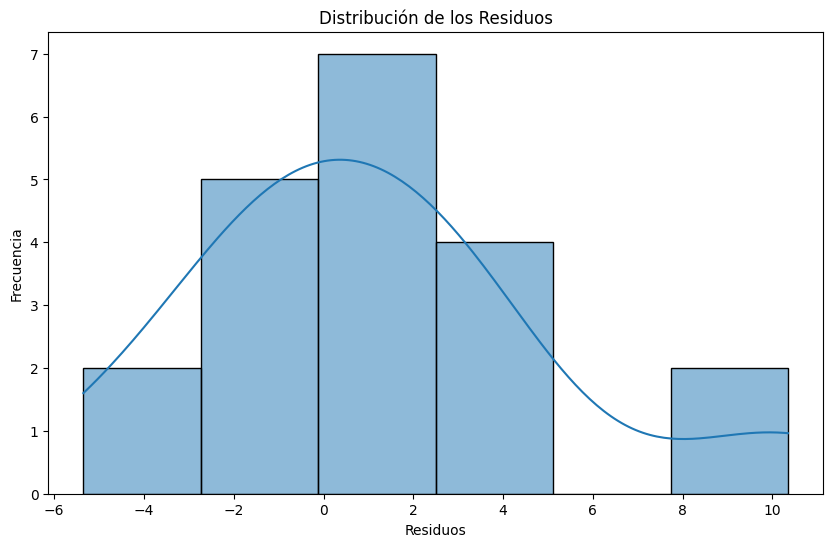

In [19]:
# Calcular los residuos
residuals = y_test - y_pred
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # Histograma con estimación de densidad
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()



In [21]:
# Solicitar al usuario que ingrese un valor de temperatura
temp_input = float(input("Introduce la temperatura (°C) para predecir el consumo energético: "))

# Convertir el input en un DataFrame con el nombre de la columna 'Temperature'
temp_df = pd.DataFrame([[temp_input]], columns=['Temperature'])

# Realizar la predicción utilizando el modelo entrenado
prediccion_consumo = model.predict(temp_df)

# Mostrar la predicción
print(f"La predicción del consumo energético para una temperatura de {temp_input}°C es: {prediccion_consumo[0]:.2f} kWh")


Introduce la temperatura (°C) para predecir el consumo energético: 90
La predicción del consumo energético para una temperatura de 90.0°C es: 231.20 kWh


In [22]:
# Obtener el intercepto y la pendiente
intercepto = model.intercept_
pendiente = model.coef_[0]

# Mostrar el intercepto, pendiente y la fórmula
print(f"Intercepto (b0): {intercepto:.2f}")
print(f"Pendiente (b1): {pendiente:.2f}")

# Fórmula de la regresión lineal
print(f"La ecuación de la recta es: y = {intercepto:.2f} + {pendiente:.2f} * x")


Intercepto (b0): 10.71
Pendiente (b1): 2.45
La ecuación de la recta es: y = 10.71 + 2.45 * x
